In [3]:
!pip install plantuml


[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: pip install --upgrade pip


In [4]:
from plantuml import PlantUML
from IPython.display import Image, display

plantuml = PlantUML(url='http://www.plantuml.com/plantuml/png/')

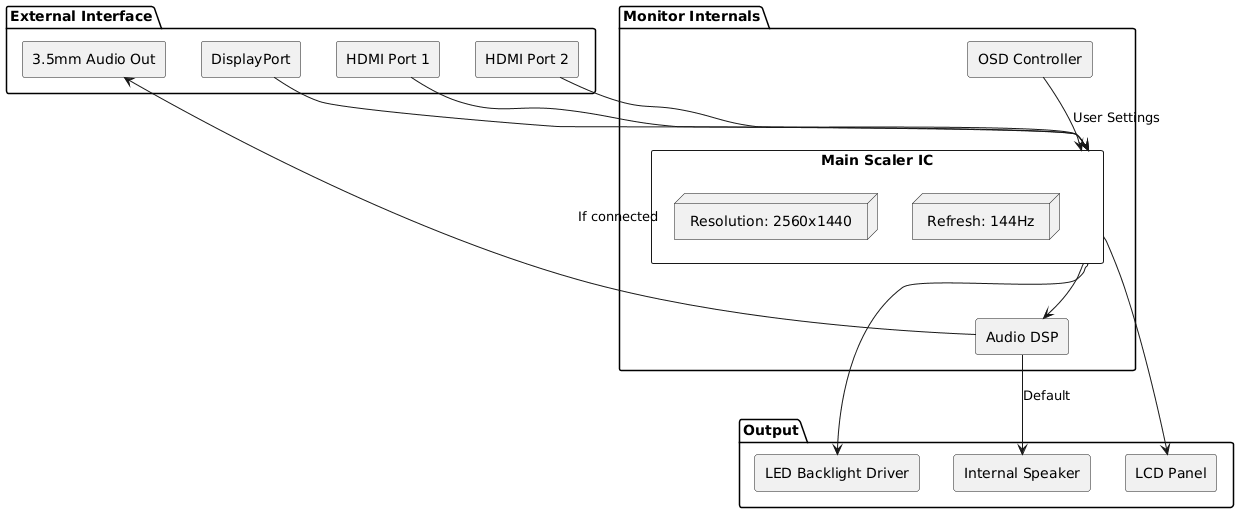

In [9]:
component_uml = """@startuml
skinparam componentStyle rectangle

package "External Interface" {
  [HDMI Port 1] as H1
  [HDMI Port 2] as H2
  [DisplayPort] as DP
  [3.5mm Audio Out] as Jack
}

package "Monitor Internals" {
  component "Main Scaler IC" as Scaler {
    node "Resolution: 2560x1440"
    node "Refresh: 144Hz"
  }
  [OSD Controller] as OSD
  [Audio DSP] as DSP
}

package "Output" {
  [LCD Panel] as Panel
  [LED Backlight Driver] as Backlight
  [Internal Speaker] as Speaker
}

H1 --> Scaler
H2 --> Scaler
DP --> Scaler

Scaler --> Panel
Scaler --> Backlight
Scaler --> DSP

OSD --> Scaler : User Settings

DSP --> Jack : If connected
DSP --> Speaker : Default
@enduml"""

img = plantuml.processes(component_uml)
display(Image(img))

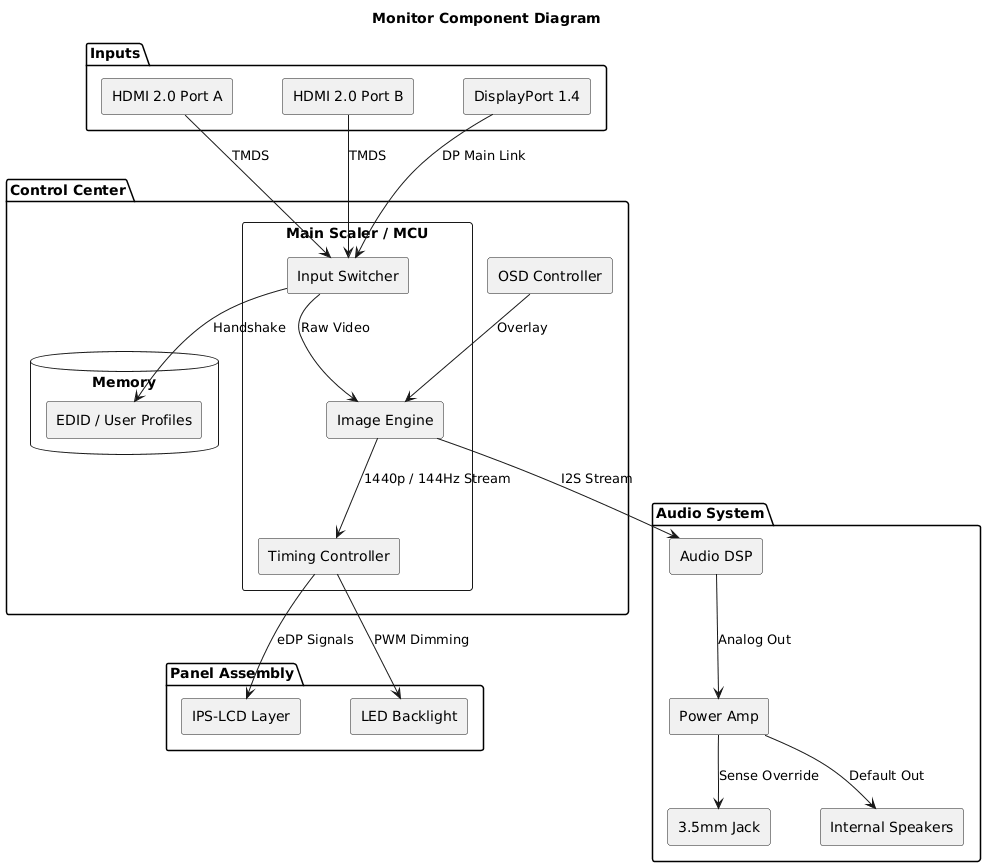

In [16]:
component_uml = """@startuml
' Removing ortho linetype to prevent jumbling
skinparam componentStyle rectangle
skinparam nodesep 50
skinparam ranksep 50

title Monitor Component Diagram

package "Inputs" {
    [HDMI 2.0 Port A] as H1
    [HDMI 2.0 Port B] as H2
    [DisplayPort 1.4] as DP
}

package "Control Center" {
    component "Main Scaler / MCU" as Scaler {
        [Input Switcher] as Switch
        [Image Engine] as Engine
        [Timing Controller] as TCON
    }
    
    database "Memory" {
        [EDID / User Profiles] as NVRAM
    }
    
    [OSD Controller] as OSD
}

package "Audio System" {
    [Audio DSP] as DSP
    [Power Amp] as Amp
    [3.5mm Jack] as Jack
    [Internal Speakers] as Speakers
}

package "Panel Assembly" {
    [IPS-LCD Layer] as IPS
    [LED Backlight] as LED
}

' Video Paths
H1 --> Switch : TMDS
H2 --> Switch : TMDS
DP --> Switch : DP Main Link

Switch --> NVRAM : Handshake
Switch --> Engine : Raw Video
Engine --> TCON : 1440p / 144Hz Stream
TCON --> IPS : eDP Signals
TCON --> LED : PWM Dimming
OSD --> Engine : Overlay

' Audio Paths
Engine --> DSP : I2S Stream
DSP --> Amp : Analog Out
Amp --> Jack : Sense Override
Amp --> Speakers : Default Out

@enduml"""

img = plantuml.processes(component_uml)
display(Image(img))

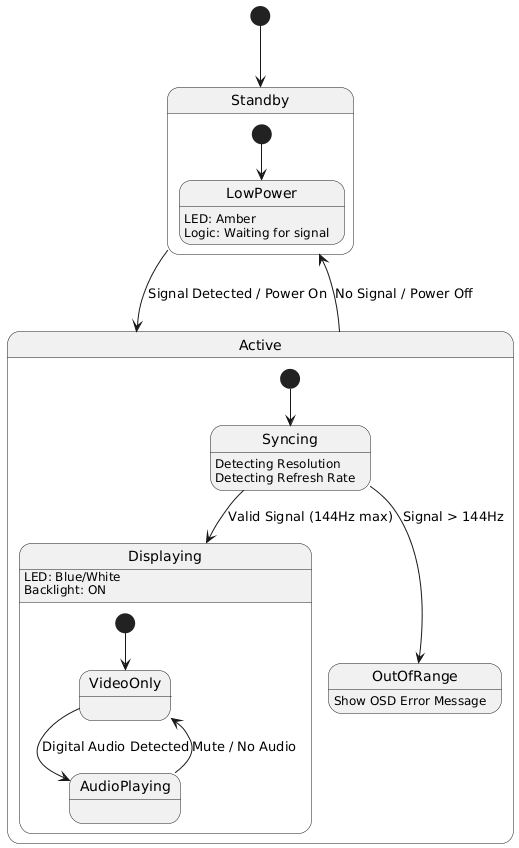

In [10]:
state_uml = """@startuml
[*] --> Standby

state Standby {
  [*] --> LowPower
  LowPower : LED: Amber
  LowPower : Logic: Waiting for signal
}

Standby --> Active : Signal Detected / Power On
Active --> Standby : No Signal / Power Off

state Active {
  [*] --> Syncing
  Syncing : Detecting Resolution
  Syncing : Detecting Refresh Rate
  
  Syncing --> Displaying : Valid Signal (144Hz max)
  Displaying : LED: Blue/White
  Displaying : Backlight: ON
  
  Syncing --> OutOfRange : Signal > 144Hz
  OutOfRange : Show OSD Error Message
  
  state Displaying {
    [*] --> VideoOnly
    VideoOnly --> AudioPlaying : Digital Audio Detected
    AudioPlaying --> VideoOnly : Mute / No Audio
  }
}
@enduml"""

img = plantuml.processes(state_uml)
display(Image(img))

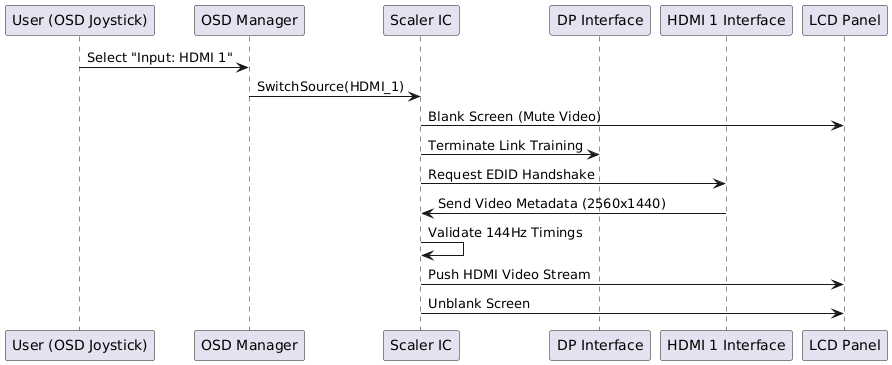

In [11]:
sequence_uml = """@startuml
participant "User (OSD Joystick)" as User
participant "OSD Manager" as OSD
participant "Scaler IC" as Scaler
participant "DP Interface" as DP
participant "HDMI 1 Interface" as H1
participant "LCD Panel" as Panel

User -> OSD : Select "Input: HDMI 1"
OSD -> Scaler : SwitchSource(HDMI_1)

Scaler -> Panel : Blank Screen (Mute Video)
Scaler -> DP : Terminate Link Training

Scaler -> H1 : Request EDID Handshake
H1 -> Scaler : Send Video Metadata (2560x1440)

Scaler -> Scaler : Validate 144Hz Timings
Scaler -> Panel : Push HDMI Video Stream
Scaler -> Panel : Unblank Screen
@enduml"""

img = plantuml.processes(sequence_uml)
display(Image(img))